In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [3]:
df=pd.read_csv('cement_slump.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


<Axes: >

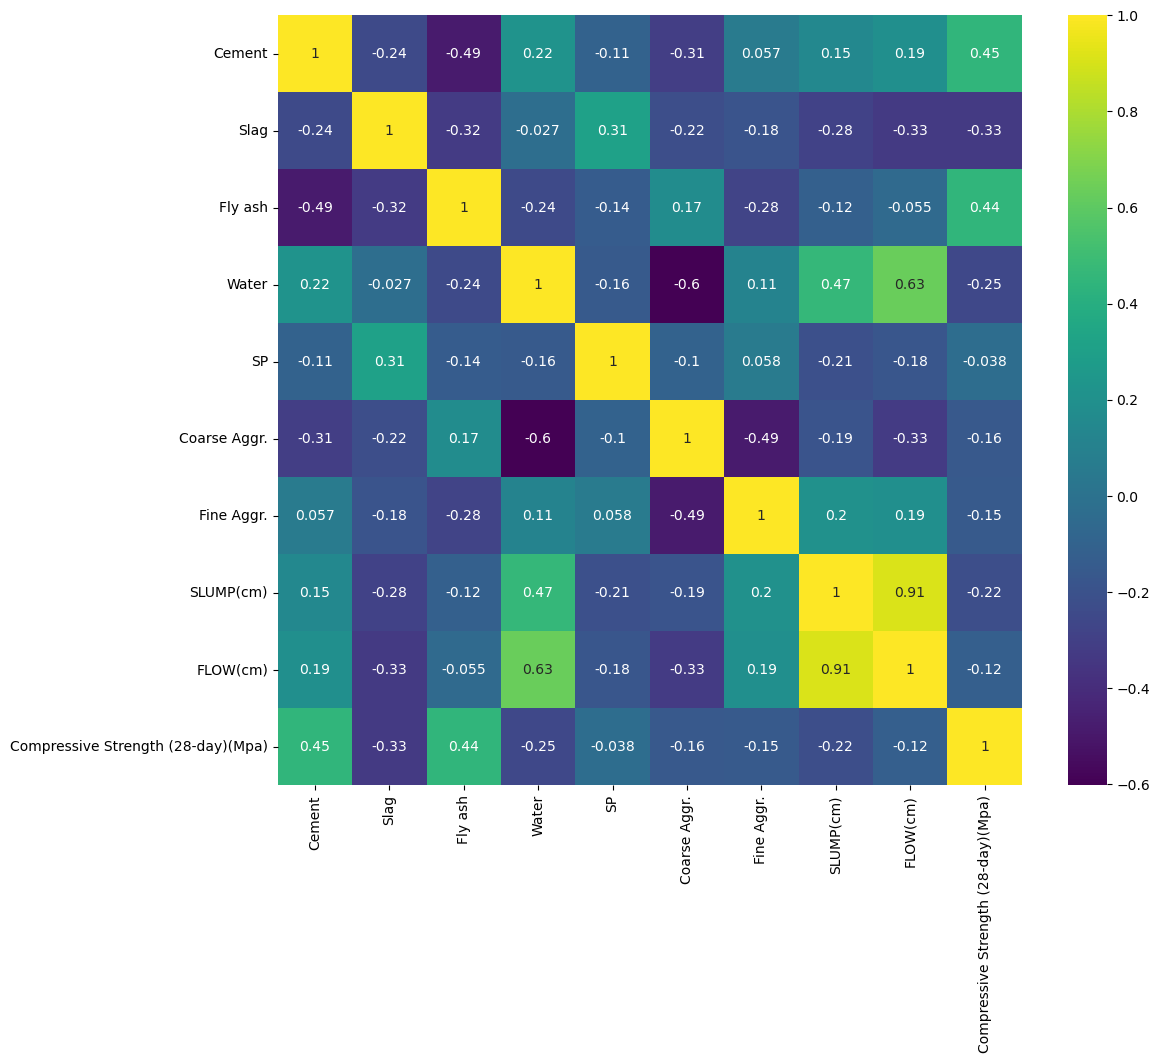

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr() , annot=True , cmap='viridis')

In [20]:
df.corr()['Compressive Strength (28-day)(Mpa)'].sort_values()

Slag                                 -0.331522
Water                                -0.254320
SLUMP(cm)                            -0.223499
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
FLOW(cm)                             -0.124189
SP                                   -0.037909
Fly ash                               0.444380
Cement                                0.445656
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR , LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# train | test & scaling & pipe_modeling

In [13]:
X=df.drop('Compressive Strength (28-day)(Mpa)' , axis=1)
y=df['Compressive Strength (28-day)(Mpa)']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.1 , random_state=101)

scale=StandardScaler()
svr_model=SVR()

operation=[('scale' , scale) , ('svr_model' , svr_model)]
pipe=Pipeline(operation)

# grid_search for svr

In [54]:
param_grid={'svr_model__C' : [.01 , .1 , .5 , 1 , 1.5 , 2, 2.5 , 3 , 3.5],
            'svr_model__kernel' :['linear' , 'precomputed' , 'rbf' , 'poly'],
            'svr_model__degree' : [1,2,3,4] , 
            'svr_model__gamma' :['auto' , 'scale'],
            'svr_model__epsilon' :[.1 , .5 , 1 , 2 , 2.5 , 3 , 3.5]}
grid_model=GridSearchCV(pipe , param_grid=param_grid , cv=10)

In [56]:
grid_model.fit(X_train , y_train)

C:\Users\Ziba\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5040 fits failed out of a total of 20160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1008 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ziba\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ziba\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ziba\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svr_model', SVR())]),
             param_grid={'svr_model__C': [0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 3,
                                          3.5],
                         'svr_model__degree': [1, 2, 3, 4],
                         'svr_model__epsilon': [0.1, 0.5, 1, 2, 2.5, 3, 3.5],
                         'svr_model__gamma': ['auto', 'scale'],
                         'svr_model__kernel': ['linear', 'precomputed', 'rbf',
                                               'poly']})

In [58]:
grid_model.best_params_

{'svr_model__C': 2.5,
 'svr_model__degree': 1,
 'svr_model__epsilon': 2.5,
 'svr_model__gamma': 'auto',
 'svr_model__kernel': 'linear'}

In [60]:
grid_model.best_score_

0.8283489951472822

# model Evaluating

In [63]:
y_pred=grid_model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [67]:
mean_absolute_error(y_test , y_pred)

1.2234892109238542

In [69]:
np.sqrt(mean_squared_error(y_test , y_pred))

1.4329832535250662

In [74]:
df['Compressive Strength (28-day)(Mpa)'].mean()

36.03873786407767

In [76]:
1.4329832535250662 / 36.03873786407767

0.039762304077619236

# linear Regression

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

In [81]:
train_RMSE_error=[]
test_RMSE_error=[]

for d in range(1,11):
    poly_feature=PolynomialFeatures(degree=d)
    poly_feature=poly_feature.fit_transform(X)
   
    X_train , X_test , y_train , y_test=train_test_split(poly_feature , y , test_size=.1 , random_state=101)

    scale=StandardScaler()
    X_train=scale.fit_transform(X_train)
    X_test=scale.transform(X_test)

    linear_model=LinearRegression()
    linear_model.fit(X_train , y_train)

    train_pred=linear_model.predict(X_train)
    test_pred=linear_model.predict(X_test)

    train_RMSE=np.sqrt(mean_squared_error(y_train , train_pred))
    test_RMSE=np.sqrt(mean_squared_error(y_test , test_pred))

    train_RMSE_error.append(train_RMSE)
    test_RMSE_error.append(test_RMSE)
    

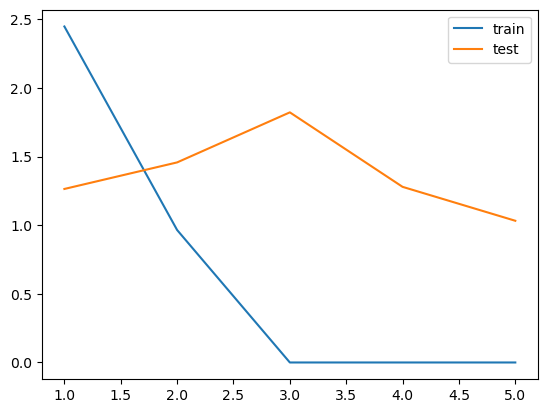

In [83]:
plt.plot(range(1,6) , train_RMSE_error[:5] , label='train')
plt.plot(range(1,6) , test_RMSE_error[:5] , label='test')
plt.legend()

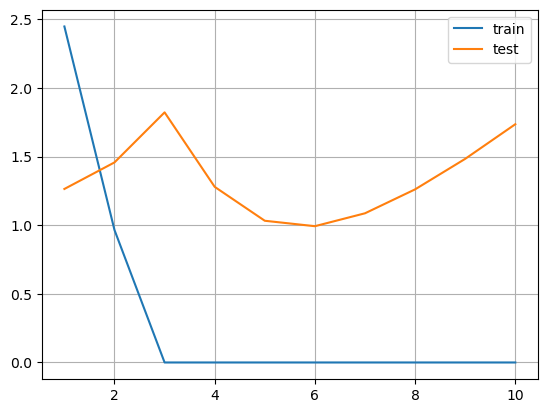

In [91]:
plt.plot(range(1,11) , train_RMSE_error[:] , label='train')
plt.plot(range(1,11) , test_RMSE_error[:] , label='test')
plt.legend()
plt.grid()

In [105]:
poly_feature=PolynomialFeatures(degree=6)
poly_feature=poly_feature.fit_transform(X)
   
X_train , X_test , y_train , y_test=train_test_split(poly_feature , y , test_size=.1 , random_state=101)

scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

linear_model=LinearRegression()
linear_model.fit(X_train , y_train)

y_pred=linear_model.predict(X_test)

np.sqrt(mean_squared_error(y_test , y_pred))

0.9928599505280755

In [107]:
0.9928599505280755 / 36.03873786407767

0.027549798060983944

# elastic model

In [11]:
from sklearn.linear_model import ElasticNetCV

In [15]:
elastic_model=ElasticNetCV(l1_ratio=[.1 , .3 , .5 , .7 , .9 , .95 , 1] , eps=.001 , n_alphas=100 , max_iter=10000000 , cv=10)
elastic_model.fit(X_train , y_train)

ElasticNetCV(cv=10, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 1],
             max_iter=10000000)

In [17]:
elastic_model.l1_ratio_

1.0

In [19]:
y_pred=elastic_model.predict(X_test)

In [22]:
mean_absolute_error(y_test , y_pred)

1.086425639657864

In [24]:
np.sqrt(mean_squared_error(y_test , y_pred))

1.3775335594904754

In [26]:
1.3775335594904754 / 36.03873786407767

0.03822369042683816